# Data Preparation For Final Training

The datasets contain three different type of resource.

1. Resource from RTL resource.
2. Resource from dictionary sample sentence.
3. Resource from RTL resource 2024.


## Data Preprocessing

### Dictionary data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_df = pd.read_json('data/source/dic.jsonl', lines=True)

print (f"Drop NA Before: {len(test_df)}")
test_df.dropna(subset=["sentence"], inplace=True)
print (f"Drop NA After: {len(test_df)}")
test_df["sentence"] = test_df["sentence"].str.strip().str.capitalize()
test_df["sentence_length"] = test_df["sentence"].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(test_df["sentence_length"], bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

Drop NA Before: 56376
Drop NA After: 56376


In [ ]:
# test_df.to_json("data/processed/dic_sentences.jsonl", orient="records", lines=True)

### RTL 2024

40632
40543


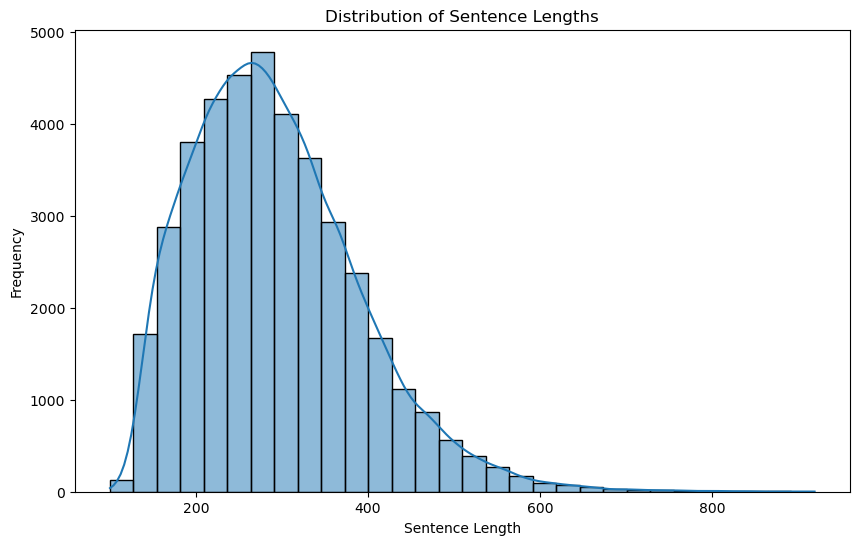

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_output_df = pd.read_json('data/processed/RTL2024_subsentences.jsonl',lines=True)
filtered_output_df["subsentence"] = filtered_output_df["subsentence"].astype(str)
print(len(filtered_output_df))
filtered_output_df = filtered_output_df[~filtered_output_df["subsentence"].str.contains("LINK", case=True, na=False)]
print(len(filtered_output_df))


filtered_output_df["sentence_length"] = filtered_output_df["subsentence"].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(filtered_output_df["sentence_length"], bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()